# Project 3: Web APIs & NLP
## *Visualizations*

Some basic visualizations for word counts.

In this notebook:

* [Word Counts](#word-counts)
* [Word Counts by Subreddit](#word-subreddit)

#### Import Libraries & Read in Data

In [1]:
## standard imports 
import pandas as pd 
import numpy as np
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.dummy import DummyClassifier
## modeling
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
## analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score

## NLP
from sklearn.feature_extraction.text import CountVectorizer

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [2]:
### read in data
data = pd.read_csv('../data/test_posts_clean.csv')

### Vectorize the text

In [ ]:
cv = CountVectorizer(stop_words='english')
dtm = cv.fit_transform(data['selftext'])
dtm_df = pd.DataFrame(dtm.toarray(), columns = cv.get_feature_names())

## Word Counts <a class="anchor" id="word-counts"></a>
<hr/>

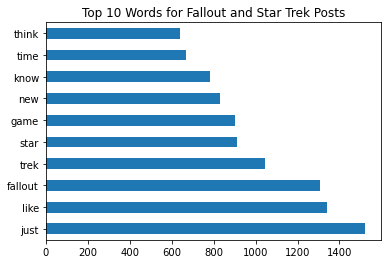

In [19]:
dtm_df.sum().nlargest(10).plot(kind='barh')
plt.title('Top 10 Words for Fallout and Star Trek Posts')
plt.savefig('../figures/top10words.png')

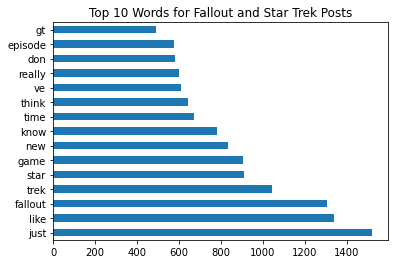

In [20]:
### what about top 15?
dtm_df.sum().nlargest(15).plot(kind='barh')
plt.title('Top 10 Words for Fallout and Star Trek Posts')
plt.savefig('../figures/top15words.png')

Might be worth going back and adding like and just to stop words

## Words Counts per Subreddit <a class="anchor" id="word-subreddit"></a>
<hr/>

Examining word counts for each subreddit.

In [ ]:
### create dataframe with vectorized text and subreddit category
dtm_df2 = pd.concat([dtm_df, data['is_fallout']], axis=1)

### Fallout Subreddit Word Counts

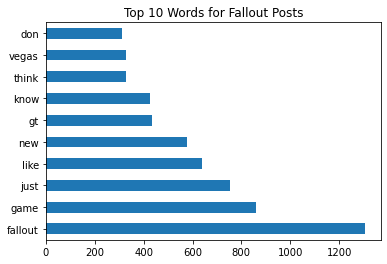

In [24]:
dtm_df2[dtm_df2['is_fallout']==1].drop(columns=['is_fallout']).sum().nlargest(10).plot(kind='barh')
plt.title('Top 10 Words for Fallout Posts')
plt.savefig('../figures/top10words_fallout.png', bbox_inches='tight')

### Star Trek Subreddit Word Counts

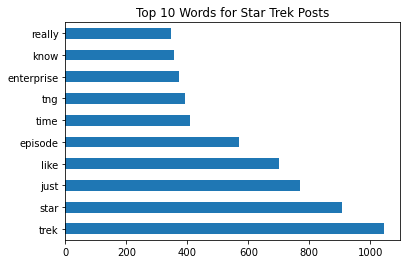

In [23]:
dtm_df2[dtm_df2['is_fallout']==0].drop(columns=['is_fallout']).sum().nlargest(10).plot(kind='barh')
plt.title('Top 10 Words for Star Trek Posts')
plt.savefig('../figures/top10words_startrek.png', bbox_inches='tight')